Best weights: [ 1.05380205 -1.37766937 -0.93782504]
Minimum classification error: 0.04


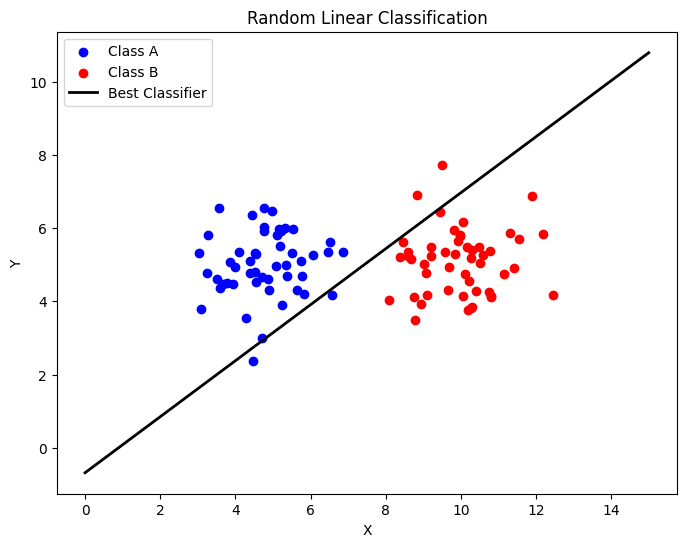

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

Ax = np.random.normal(loc=5, scale=1, size=50)
Ay = np.random.normal(loc=5, scale=1, size=50)

Bx = np.random.normal(loc=10, scale=1, size=50)
By = np.random.normal(loc=5, scale=1, size=50)

X = np.vstack((np.hstack((Ax, Bx)), np.hstack((Ay, By)))).T
y = np.array([0]*len(Ax) + [1]*len(Bx))

def predict_line(X, w):
    """Predict class using linear decision boundary w = [w0, w1, b]."""
    return (X[:,0]*w[0] + X[:,1]*w[1] + w[2] > 0).astype(int)

def classification_error(y_true, y_pred):
    return np.mean(y_true != y_pred)

K = 100
best_w = None
min_error = 1.0

for _ in range(K):

    w = np.random.randn(3)
    y_pred = predict_line(X, w)
    err = classification_error(y, y_pred)

    if err < min_error:
        min_error = err
        best_w = w

print("Best weights:", best_w)
print("Minimum classification error:", min_error)

plt.figure(figsize=(8,6))
plt.scatter(Ax, Ay, color='blue', label='Class A')
plt.scatter(Bx, By, color='red', label='Class B')

x_vals = np.linspace(0, 15, 100)
y_vals = -(best_w[0]*x_vals + best_w[2]) / best_w[1]
plt.plot(x_vals, y_vals, 'k-', linewidth=2, label='Best Classifier')

plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.title("Random Linear Classification")
plt.show()

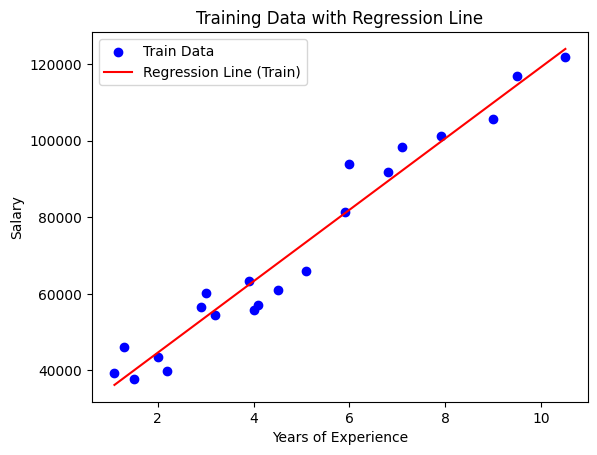

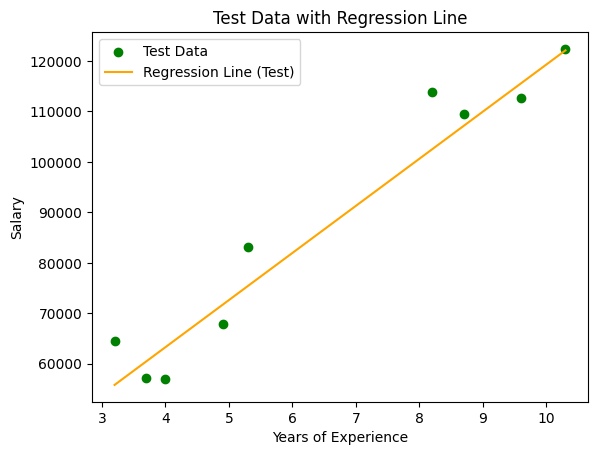

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


data = pd.read_csv('/content/Salary_Data.csv')


X = data[["YearsExperience"]].values
y = data["Salary"].values


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


model = LinearRegression()
model.fit(X_train, y_train)


y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

plt.scatter(X_train, y_train, color="blue", label="Train Data")
plt.plot(np.sort(X_train, axis=0),
         model.predict(np.sort(X_train, axis=0)),
         color="red", label="Regression Line (Train)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Training Data with Regression Line")
plt.legend()
plt.show()


plt.scatter(X_test, y_test, color="green", label="Test Data")
plt.plot(np.sort(X_test, axis=0),
         model.predict(np.sort(X_test, axis=0)),
         color="orange", label="Regression Line (Test)")
plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("Test Data with Regression Line")
plt.legend()
plt.show()

